## **El objetivo** : Predecir el precio del alquiler de Vivienda.

# 1_Instalar Librerías

In [1]:
# !pip install tabulate # que proporciona funciones para formatear datos en forma de tablas.
# !pip install seaborn # proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos
# !pip install statsmodels  #biblioteca de Python que ofrece estimación de modelos estadísticos, pruebas estadísticas y exploración de datos.
# !pip install scikit-optimize #Proporciona algoritmos para la optimización de hiperparámetros y la búsqueda de parámetros
# !pip install optuna #Optuna permite realizar búsquedas eficientes y automáticas de los mejores hiperparámetros para modelos de aprendizaje automático
# pip install fitter #  Proporciona una interfaz sencilla para ajustar diferentes distribuciones y realizar pruebas de ajuste

# 2_Importar las librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np # cálculos numéricos con matrices y vectores
import pandas as pd # ara manipular y analizar datos
from tabulate import tabulate # formatear tablas. Permite convertir listas o matrices en una tabla con formato de texto, que puede ser fácilmente impresa o exportada a otros formatos, como CSV o HTML.

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt  #  para crear gráficos y visualizaciones.
from matplotlib import style #permite personalizar el estilo visual de los gráficos, como el color de fondo, el tamaño de fuente, los colores de las líneas, entre otros.
import matplotlib.ticker as ticker #permite tener un mayor control sobre la apariencia y presentación de los ejes de tus gráficos.
import seaborn as sns #  crear gráficos estadísticos y de visualización de datos
import statsmodels.api as sm #análisis estadísticos y modelado de datos.

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split #  dividir conjuntos de datos en subconjuntos de entrenamiento y prueba
from sklearn.model_selection import GridSearchCV # búsqueda de hiperparámetros mediante validación cruzada exhaustiva
from sklearn.model_selection import RepeatedKFold # Dividir un conjunto de datos en subconjuntos de entrenamiento y prueba utilizando el método de validación cruzada repetida k-fold
from sklearn.neighbors import KNeighborsClassifier # construir modelos de clasificación basados en el algoritmo k-nearest neighbors (k-NN).
from sklearn.datasets import make_blobs # se utiliza para generar conjuntos de datos sintéticos en forma de blobs o grupos de puntos
from sklearn.metrics import euclidean_distances # calcular la distancia euclidiana entre dos conjuntos de puntos.
from sklearn.ensemble import RandomForestClassifier #utiliza para construir modelos de clasificación basados en el algoritmo de bosques aleatorios.
from sklearn.linear_model import Ridge # para construir modelos de regresión basados en el algoritmo de regresión ridge, también conocido como regularización L2.

#--  !pip install scikit-optimize
from skopt.space import Real, Integer # es una biblioteca de optimización que proporciona algoritmos para la optimización de hiperparámetros basados en la biblioteca scikit-learn
from skopt.utils import use_named_args #puedes utilizar esta función en tu código para definir funciones objetivo de una manera más clara y concisa cuando estés utilizando la optimización de hiperparámetros
from skopt import gp_minimize #Implementa la optimización bayesiana utilizando un proceso gaussiano
from skopt.plots import plot_convergence # Esto te permite evaluar la efectividad del algoritmo de optimización y comprender cómo se está acercando a la solución óptima
import optuna

# Varios
# ==============================================================================
import multiprocessing #  se utiliza para permitir la ejecución simultánea de múltiples procesos en Python, lo que puede ser muy útil para mejorar el rendimiento en tareas que son intensivas en CPU
import random # es para generar números aleatorios
from itertools import product # Esta función es útil para generar todas las combinaciones posibles de valores para varios parámetros.
from fitter import Fitter, get_common_distributions # proporciona funciones para ajustar diferentes distribuciones de probabilidad a los datos

c:\Users\Jef\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# @title Código Oculto
# para establecer el número máximo de columnas que se mostrarán en la salida cuando se imprima un DataFrame.
pd.set_option('display.max_columns',100)

In [4]:
## Ejemplo de make_blobs
# Generar conjuntos de datos sintéticos en forma de blobs
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt
# # que la generación de los grupos de puntos sea reproducible. Es decir, si utilizamos el mismo valor para random_state en diferentes momentos, 
# # siempre obtendremos el mismo conjunto de datos sintéticos generado con make_blobs(), ya que se utilizará la misma semilla 
# # aleatoria para la generación de los puntos.# # 
# # Generamos un conjunto de datos sintético con 1000 observaciones, 2 características y 3 grupos de puntos
# X, y = make_blobs(n_samples=1000000, n_features=2, centers=3, random_state=42) # si se utiliza el mismo valor varias veces, se obtendrá siempre el mismo conjunto de datos sintético
# # Graficamos los grupos de puntos generados
# # X[:, 0] y X[:, 1] como coordenadas x e y, y el vector y como variable categórica para indicar los colores de los puntos.
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.title("Conjunto de datos sintético generado con make_blobs()")
# plt.show()

# 3_DataFrame

In [2]:
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/"
    "master/data/SaratogaHouses.csv")

#Leer los datos de CSV y separarlos por comas.
datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno", "metros_habitables",
                 "universitarios", "dormitorios", "chimenea", "banyos", "habitaciones",
                 "calefaccion","consumo_calefacion", "desague", "vistas_lago", "nueva_construccion",
                 "aire_acondicionado"]

## 3.1_Descripción del DataFrame

* price: precio de la vivienda.
* lotSize: metros cuadrados de la vivienda.
* age: antigüedad de la vivienda.
* landValue: valor del terreno.
* livingArea: metros cuadrados habitables.
* pctCollege: porcentaje del vecindario con título universitario.
* bedrooms: número de dormitorios.
*firplaces: número de chimeneas.
* bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
* rooms: número de habitaciones.
*heating: tipo de calefacción.
* fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
* sewer: tipo de desagüe.
* waterfront: si la vivienda tiene vistas al lago.
* newConstruction: si la vivienda es de nueva construcción.
* centralAir: si la vivienda tiene aire acondicionado.

## 3.2_Datos_Head

In [3]:
# @title Código Oculto
datos.head(5) # Ver las primeras filas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [7]:
#Descargar las primeras 50 Filas
# datos.head(50).to_csv('Descargar_50_F.csv', index=False)

In [4]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

In [5]:
# Dimensiones del dataset
# ==============================================================================
datos.shape

(1728, 16)

In [6]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
# ==============================================================================
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\Jef\AppData\Local\Temp\ipykernel_8240\2753866420.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 3.3_Variables_Categoricas

### 3.3.0_Teoria: Entendimiento de conceptos

Cuando identificas que hay variables categóricas altamente dependientes, es importante considerar algunas acciones para garantizar un buen modelo de machine learning. Aquí hay algunas sugerencias:

1. Eliminar variables redundantes: Si tienes variables altamente dependientes entre sí, puedes considerar eliminar una de ellas para evitar la redundancia de información. Al eliminar variables redundantes, puedes simplificar el modelo y reducir el riesgo de sobreajuste.

2. Realizar codificación adecuada: Si las variables altamente dependientes son importantes para el modelo, puedes considerar realizar una codificación adecuada para capturar la información contenida en ellas. Por ejemplo, puedes utilizar técnicas de codificación como la codificación one-hot, la codificación de frecuencia o la codificación ordinal, según el caso y la naturaleza de las variables.

3. Realizar análisis adicional: Además del análisis de dependencia entre variables categóricas, es recomendable realizar análisis adicionales para comprender mejor la relación entre las variables y su impacto en el modelo. Puedes utilizar técnicas como el análisis de correlación, análisis de componentes principales (PCA) u otros métodos de reducción de dimensionalidad para explorar la estructura de tus datos.

4. Evaluar el desempeño del modelo: Después de realizar las acciones anteriores, es importante evaluar el desempeño del modelo resultante utilizando técnicas de validación y métricas de evaluación apropiadas. Esto te permitirá determinar si el modelo es capaz de generalizar correctamente y hacer predicciones precisas.

5. Considerar otras técnicas de modelado: Dependiendo del contexto y los datos disponibles, es posible que desees considerar otras técnicas de modelado que sean más adecuadas para abordar la dependencia entre variables categóricas. Por ejemplo, puedes explorar el uso de modelos de clasificación avanzados como árboles de decisión, Random Forest, Gradient Boosting, redes neuronales u otros algoritmos que puedan manejar relaciones complejas entre variables.

### 3.3.1_Selección VC

In [7]:
#método de pandas que se utiliza para seleccionar columnas basándose en el tipo de datos.
df_categoricas = datos.select_dtypes(include='object')
num_columnas = df_categoricas.shape[1]
print("Número de columnas Categoricas:", num_columnas)
print("--------------------")
# Obtener los nombres de las columnas
nombres_columnas = df_categoricas.columns

# Imprimir los nombres de las columnas
for columna in nombres_columnas:
    print(columna)

# print("Nombre de las Columnas",nombres_columnas)

Número de columnas Categoricas: 6
--------------------
calefaccion
consumo_calefacion
desague
vistas_lago
nueva_construccion
aire_acondicionado


### 3.3.2_Tabular VC por categoria

In [8]:
import pandas as pd
from tabulate import tabulate

# Crear un diccionario para almacenar las tablas de resultados
tablas_resultados = {}

# Definir función de formato para los porcentajes
def formatear_porcentaje(valor):
    return "{:.2f}%".format(valor)

# Iterar a través de cada columna
for columna in df_categoricas.columns:
    # Calcular la frecuencia de cada categoría
    frecuencia = df_categoricas[columna].value_counts()
    
    # Calcular el porcentaje de cada categoría
    porcentaje = df_categoricas[columna].value_counts(normalize=True) * 100
    
    # Combinar la frecuencia y el porcentaje en una tabla
    tabla = pd.concat([frecuencia, porcentaje], axis=1, keys=['Frecuencia', 'Porcentaje'])
    
    # Ordenar la tabla por la frecuencia descendente
    tabla = tabla.sort_values(('Frecuencia'), ascending=False)

    # Aplicar formato de porcentaje a la columna de porcentajes
    tabla['Porcentaje'] = tabla['Porcentaje'].map(formatear_porcentaje)
    
    # Almacenar la tabla de resultados en el diccionario
    tablas_resultados[columna] = tabla

# Imprimir los resultados en tablas
for columna, tabla in tablas_resultados.items():
    print("Variable:", columna)
    print(tabulate(tabla, headers='keys', tablefmt='psql'))
    print()


Variable: calefaccion
+-----------------+--------------+--------------+
|                 |   Frecuencia | Porcentaje   |
|-----------------+--------------+--------------|
| hot air         |         1121 | 64.87%       |
| electric        |          305 | 17.65%       |
| hot water/steam |          302 | 17.48%       |
+-----------------+--------------+--------------+

Variable: consumo_calefacion
+----------+--------------+--------------+
|          |   Frecuencia | Porcentaje   |
|----------+--------------+--------------|
| gas      |         1197 | 69.27%       |
| electric |          315 | 18.23%       |
| oil      |          216 | 12.50%       |
+----------+--------------+--------------+

Variable: desague
+-------------------+--------------+--------------+
|                   |   Frecuencia | Porcentaje   |
|-------------------+--------------+--------------|
| public/commercial |         1213 | 70.20%       |
| septic            |          503 | 29.11%       |
| none            

### 3.3.3_Tabular VC 

In [9]:
# Calcular la frecuencia de cada categoría
frecuencia = df_categoricas.apply(pd.Series.value_counts)

# Calcular el porcentaje de cada categoría
porcentaje = df_categoricas.apply(pd.Series.value_counts, normalize=True) * 100

# Combinar la frecuencia y el porcentaje en una tabla
tabla = pd.concat([frecuencia, porcentaje], axis=1, keys=['Frecuencia', 'Porcentaje'])

# Desapilar el índice múltiple
tabla = tabla.stack().reset_index().rename(columns={'level_1': 'Variable'})

# Ordenar la tabla por la frecuencia descendente
tabla = tabla.sort_values(('Frecuencia'), ascending=False)

# Aplicar formato de porcentaje a la columna de porcentajes
tabla['Porcentaje'] = tabla['Porcentaje'].map(formatear_porcentaje)

print(tabla)

              level_0            Variable  Frecuencia Porcentaje
0                  No         vistas_lago      1713.0     99.13%
1                  No  nueva_construccion      1647.0     95.31%
13  public/commercial             desague      1213.0     70.20%
8                 gas  consumo_calefacion      1197.0     69.27%
9             hot air         calefaccion      1121.0     64.87%
2                  No  aire_acondicionado      1093.0     63.25%
5                 Yes  aire_acondicionado       635.0     36.75%
14             septic             desague       503.0     29.11%
7            electric  consumo_calefacion       315.0     18.23%
6            electric         calefaccion       305.0     17.65%
10    hot water/steam         calefaccion       302.0     17.48%
12                oil  consumo_calefacion       216.0     12.50%
4                 Yes  nueva_construccion        81.0      4.69%
3                 Yes         vistas_lago        15.0      0.87%
11               none    

### 3.3.4_chi_cuadrado
* La prueba de Chi-Cuadrado es un procedimiento estadístico utilizado para determinar si existe una diferencia significativa entre los resultados esperados y los observados en una o más categorías.

* Estadístico Chi-cuadrado: Es el valor obtenido del estadístico chi-cuadrado para cada combinación de columnas. Cuanto mayor sea este valor, mayor será la asociación entre las variables.

* Valor p: Es el valor p asociado al estadístico chi-cuadrado. Indica la probabilidad de obtener un estadístico chi-cuadrado igual o más extremo que el observado bajo la hipótesis nula de independencia entre las variables. Un valor p menor a un nivel de significancia predefinido (como 0.05) sugiere que existe evidencia suficiente para rechazar la hipótesis nula de independencia.


* Por lo tanto, si obtienes un valor p menor a 0.05 en un análisis de contingencia, se sugiere que existe evidencia suficiente para rechazar la hipótesis nula de independencia y concluir que hay una asociación significativa entre las variables categóricas analizadas.

In [10]:
columnas = ['calefaccion', 'consumo_calefacion', 'desague', 'vistas_lago', 'nueva_construccion', 'aire_acondicionado']
df_seleccionado = datos.loc[:, columnas]

In [13]:
matrices_contingencia = {}
for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        matriz = pd.crosstab(df_seleccionado[columnas[i]], df_seleccionado[columnas[j]])
        matrices_contingencia[(columnas[i], columnas[j])] = matriz

* La combinación de columnas ('calefaccion', 'consumo_calefacion') muestra un estadístico chi-cuadrado de 1594.38 y un valor p de 0, lo que indica una asociación significativa entre estas dos variables.

* Para las combinaciones ('calefaccion', 'desague'), ('calefaccion', 'vistas_lago'), ('vistas_lago', 'nueva_construccion') y ('vistas_lago', 'aire_acondicionado'), los valores p son mayores que 0.05, lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de independencia.

* En cambio, para las combinaciones ('calefaccion', 'nueva_construccion'), ('calefaccion', 'aire_acondicionado'), ('consumo_calefacion', 'desague'), ('consumo_calefacion', 'vistas_lago'), ('consumo_calefacion', 'nueva_construccion'), ('consumo_calefacion', 'aire_acondicionado'), ('desague', 'nueva_construccion'), y ('desague', 'aire_acondicionado'), los valores p son muy pequeños, lo que indica una asociación significativa entre estas variables.

* En resumen, los resultados de la prueba de chi-cuadrado muestran que algunas combinaciones de columnas presentan una asociación significativa, mientras que otras no. Esto puede ser útil para comprender la relación entre las variables categóricas y detectar posibles dependencias o patrones en los datos

In [25]:
from tabulate import tabulate
from colorama import Fore, Style

tabla_resultados = []
for columnas, resultado in resultados.items():
    fila = [columnas, resultado['Estadístico Chi-cuadrado'], resultado['Valor p']]
    tabla_resultados.append(fila)

headers = ["Columnas", "Estadístico Chi-cuadrado", "Valor p"]

# Filtrar las variables significativas dependientes e independientes
variables_dependientes = []
variables_independientes = []
nivel_significancia = 0.05

for fila in tabla_resultados:
    if fila[2] < nivel_significancia:
        variables_dependientes.append(fila[0])
    else:
        variables_independientes.append(fila[0])

# Tabla de variables significativas dependientes
tabla_dependientes = []
for variable in variables_dependientes:
    fila = [Fore.GREEN + ", ".join(variable) + Style.RESET_ALL]
    tabla_dependientes.append(fila)

headers_dependientes = ["Variables Significativas Dependientes"]

# Tabla de variables independientes
tabla_independientes = []
for variable in variables_independientes:
    fila = [variable]
    tabla_independientes.append(fila)

headers_independientes = ["Variables Independientes"]

# Imprimir las tablas resaltando las variables más correlacionadas
tabla_formato_resultados = tabulate(tabla_resultados, headers=headers, tablefmt="grid")
tabla_formato_dependientes = tabulate(tabla_dependientes, headers=headers_dependientes, tablefmt="grid")
tabla_formato_independientes = tabulate(tabla_independientes, headers=headers_independientes, tablefmt="grid")

# Imprimir tabla de resultados
print("Tabla de Resultados:")
print(tabla_formato_resultados)

# Imprimir tabla de variables significativas dependientes
print("\nTabla de Variables Significativas Dependientes:")
print(tabla_formato_dependientes)

# Imprimir tabla de variables independientes
print("\nTabla de Variables Independientes:")
print(tabla_formato_independientes)


Tabla de Resultados:
+---------------------------------------+----------------------------+-----------+
| Columnas                              |   Estadístico Chi-cuadrado |   Valor p |
+=======================================+============================+===========+
| ('calefaccion', 'consumo_calefacion') |                    1594.38 |         0 |
+---------------------------------------+----------------------------+-----------+

Tabla de Variables Significativas Dependientes:
+-----------------------------------------+
| Variables Significativas Dependientes   |
+=========================================+
| calefaccion, consumo_calefacion         |
+-----------------------------------------+

Tabla de Variables Independientes:
+----------------------------+
| Variables Independientes   |
+============================+
+----------------------------+


In [26]:
# Matriz de Correlación variable categoricas.
# coeficiente de contingencia o el coeficiente de Pearson ajustado 
import pandas as pd
from scipy.stats import chi2_contingency

# Seleccionar solo las variables categóricas
df_categoricas = datos.select_dtypes(include='object')

# Calcular la matriz de correlación para variables categóricas
correlation_matrix = pd.DataFrame(index=df_categoricas.columns, columns=df_categoricas.columns)

for var1 in df_categoricas.columns:
    for var2 in df_categoricas.columns:
        if var1 == var2:
            correlation_matrix.loc[var1, var2] = '100.0%'
        else:
            # Crear la tabla de contingencia
            contingency_table = pd.crosstab(df_categoricas[var1], df_categoricas[var2])
            
            # Calcular el coeficiente de contingencia
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            phi2 = chi2 / n
            correlation = np.sqrt(phi2 / (phi2 + n))
            
            # Convertir la correlación a porcentaje
            correlation_percent = f"{correlation * 100:.2f}%"
            
            correlation_matrix.loc[var1, var2] = correlation_percent
correlation_matrix

,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
calefaccion,100.0%,2.31%,0.16%,0.03%,0.36%,0.85%
consumo_calefacion,2.31%,100.0%,0.98%,0.24%,0.34%,0.57%
desague,0.16%,0.98%,100.0%,0.09%,0.16%,0.39%
vistas_lago,0.03%,0.24%,0.09%,100.0%,0.01%,0.03%
nueva_construccion,0.36%,0.34%,0.16%,0.01%,100.0%,0.17%
aire_acondicionado,0.85%,0.57%,0.39%,0.03%,0.17%,100.0%


Distribución de clases para la variable calefaccion
hot air            1121
electric            305
hot water/steam     302
Name: calefaccion, dtype: int64



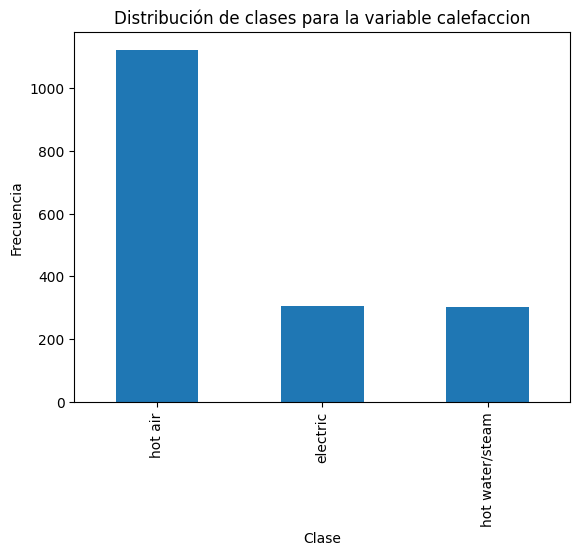

Proporciones de clases para la variable calefaccion
hot air            0.648727
electric           0.176505
hot water/steam    0.174769
Name: calefaccion, dtype: float64

Clases desequilibradas en la variable calefaccion
Index(['electric', 'hot water/steam'], dtype='object')

Distribución de clases para la variable consumo_calefacion
gas         1197
electric     315
oil          216
Name: consumo_calefacion, dtype: int64



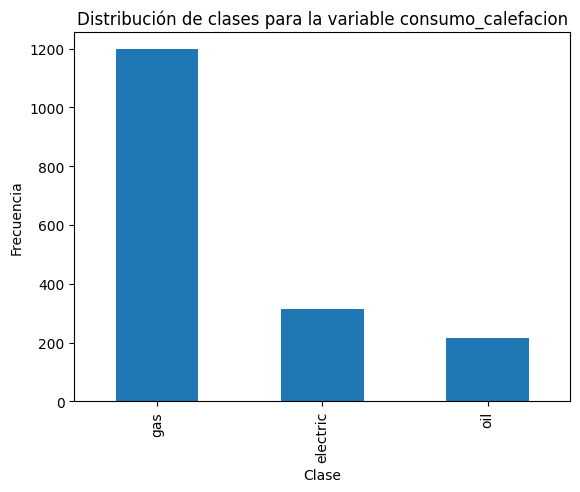

Proporciones de clases para la variable consumo_calefacion
gas         0.692708
electric    0.182292
oil         0.125000
Name: consumo_calefacion, dtype: float64

Clases desequilibradas en la variable consumo_calefacion
Index(['electric', 'oil'], dtype='object')

Distribución de clases para la variable desague
public/commercial    1213
septic                503
none                   12
Name: desague, dtype: int64



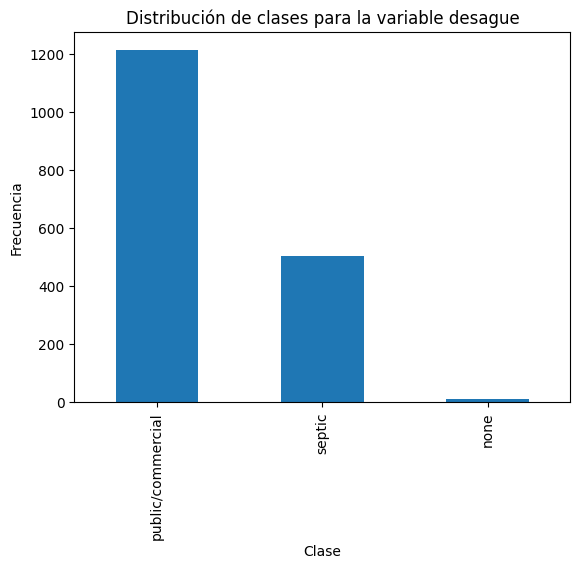

Proporciones de clases para la variable desague
public/commercial    0.701968
septic               0.291088
none                 0.006944
Name: desague, dtype: float64

Clases desequilibradas en la variable desague
Index(['septic', 'none'], dtype='object')

Distribución de clases para la variable vistas_lago
No     1713
Yes      15
Name: vistas_lago, dtype: int64



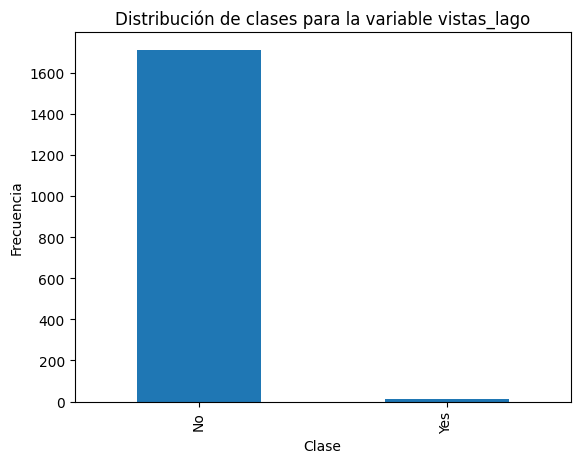

Proporciones de clases para la variable vistas_lago
No     0.991319
Yes    0.008681
Name: vistas_lago, dtype: float64

Clases desequilibradas en la variable vistas_lago
Index(['Yes'], dtype='object')

Distribución de clases para la variable nueva_construccion
No     1647
Yes      81
Name: nueva_construccion, dtype: int64



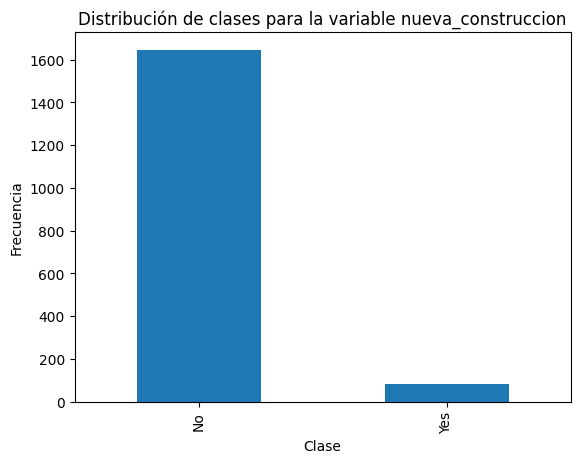

Proporciones de clases para la variable nueva_construccion
No     0.953125
Yes    0.046875
Name: nueva_construccion, dtype: float64

Clases desequilibradas en la variable nueva_construccion
Index(['Yes'], dtype='object')

Distribución de clases para la variable aire_acondicionado
No     1093
Yes     635
Name: aire_acondicionado, dtype: int64



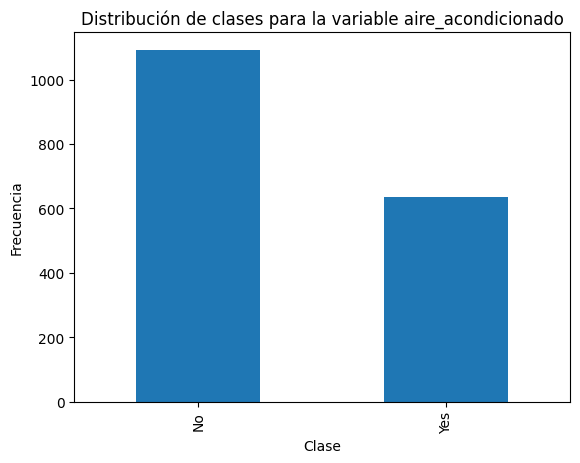

Proporciones de clases para la variable aire_acondicionado
No     0.632523
Yes    0.367477
Name: aire_acondicionado, dtype: float64

Clases desequilibradas en la variable aire_acondicionado
Index(['Yes'], dtype='object')



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar variables categóricas
df_categoricas = datos.select_dtypes(include='object')

# Calcular la distribución de clases
for columna in df_categoricas.columns:
    clase_counts = df_categoricas[columna].value_counts()
    print("Distribución de clases para la variable", columna)
    print(clase_counts)
    print()

    # Visualizar la distribución de clases
    clase_counts.plot(kind='bar')
    plt.title("Distribución de clases para la variable " + columna)
    plt.xlabel("Clase")
    plt.ylabel("Frecuencia")
    plt.show()

    # Calcular las proporciones de clases
    total_observaciones = len(df_categoricas[columna])
    proporciones = clase_counts / total_observaciones
    print("Proporciones de clases para la variable", columna)
    print(proporciones)
    print()

    # Evaluar las proporciones de clases
    umbral_desequilibrio = 0.1  # Umbral de desequilibrio del 10%
    clases_desequilibradas = proporciones[proporciones < umbral_desequilibrio].index
    if len(clases_desequilibradas) > 0:
        print("Clases desequilibradas en la variable", columna)
        print(clases_desequilibradas)
        print()


In [ ]:
import pandas as pd
from tabulate import tabulate

# Calcular la distribución de clases y proporciones de cada variable categórica
tabla_distribucion = []
variables_desequilibradas = []

for columna in df_categoricas.columns:
    # Calcular la distribución de clases
    distribucion = df_categoricas[columna].value_counts().tolist()
    
    # Calcular las proporciones de clases
    proporciones = (df_categoricas[columna].value_counts() / len(df_categoricas)).tolist()
    
    # Verificar si la variable está desequilibrada
    if min(proporciones) < 0.1:
        variables_desequilibradas.append(columna)
    
    # Agregar los resultados a la tabla
    tabla_distribucion.append([columna, distribucion, proporciones])

# Mostrar la tabla de distribución
headers = ["Variable", "Distribución de Clases", "Proporciones"]
tabla_formato = tabulate(tabla_distribucion, headers=headers, tablefmt="grid")
print(tabla_formato)

# Mostrar las variables desequilibradas con su argumento explicativo
print("\nVariables Desequilibradas:")
for variable in variables_desequilibradas:
    argumento = "La variable {} presenta un desbalanceo de clases, ya que al menos una clase tiene una proporción menor al 10%.".format(variable)
    print("- ", argumento)



+--------------------+--------------------------+-----------------------------------------------------------------+
| Variable           | Distribución de Clases   | Proporciones                                                    |
+====================+==========================+=================================================================+
| calefaccion        | [1121, 305, 302]         | [0.6487268518518519, 0.17650462962962962, 0.17476851851851852]  |
+--------------------+--------------------------+-----------------------------------------------------------------+
| consumo_calefacion | [1197, 315, 216]         | [0.6927083333333334, 0.18229166666666666, 0.125]                |
+--------------------+--------------------------+-----------------------------------------------------------------+
| desague            | [1213, 503, 12]          | [0.7019675925925926, 0.29108796296296297, 0.006944444444444444] |
+--------------------+--------------------------+-----------------------

## 3.4_Variables_Numericas

### Selección de Variables Numericas

In [ ]:
# Descripción general de las variables cuantitativas.
# ==============================================================================
datos.describe().round().astype(int)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
mean,211967,1,28,34557,1755,56,3,1,2,7
std,98441,1,29,35021,620,10,1,1,1,2
min,5000,0,0,200,616,20,1,0,0,2
25%,145000,0,13,15100,1300,52,3,0,2,5
50%,189900,0,19,25000,1634,57,3,1,2,7
75%,259000,1,34,40200,2138,64,4,1,2,8
max,775000,12,225,412600,5228,82,7,4,4,12


In [ ]:
df_numericas = datos.select_dtypes(include=['int', 'float'])
df_numericas.head(2)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
0,132500,0.09,42,50000,906,35,2,1,1.0,5
1,181115,0.92,0,22300,1953,51,3,0,2.5,6


In [ ]:
correlation_matrix = datos.corr()
correlation_matrix
threshold = 0.8
redundant_vars = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            redundant_vars.add(colname)
print(correlation_matrix.head())


# Número de observaciones y valores ausentes

In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

# Analisis de la Variable respuesta - Normal
Cuando se crea un modelo, es muy importante estudiar la distribución de la variable respuesta, ya que, a fin de cuentas, es lo que interesa predecir. La variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada

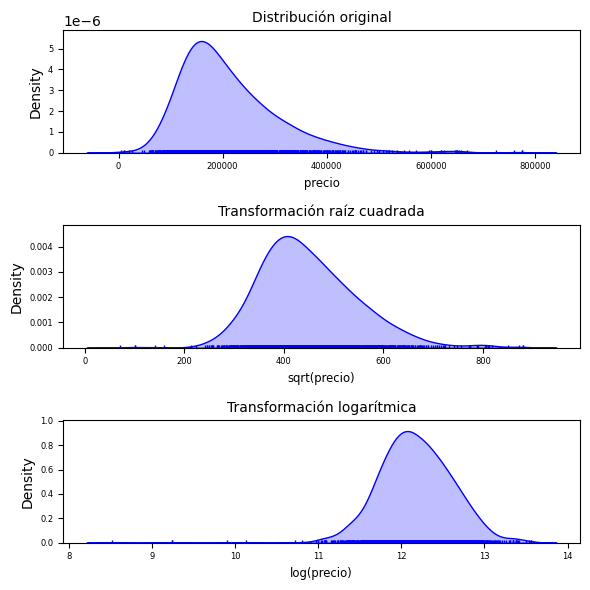

In [ ]:
# La figura tiene tres filas y una columna (nrows=3, ncols=1), lo que significa que habrá tres subtramas en la figura
# También se especifica el tamaño de la figura (figsize=(6,6)).
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6)) 
sns.kdeplot( #un gráfico de densidad de kernel
    datos.precio, # El eje x del gráfico muestra los precios
    fill    = True, # se utiliza para rellenar el área bajo la curva de densidad de kernel
    color   = "blue", # establece el color de la curva de densidad de kernel
    ax      = axes[0] #se utiliza para especificar que la subtrama en la fila 1, columna 1 (axes[0]) será utilizada para trazar este gráfico
)
sns.rugplot( #  traza una representación de las observaciones individuales de la variable de interés
    datos.precio, # 
    color   = "blue",#
    ax      = axes[0] # 
)
axes[0].set_title("Distribución original", fontsize = 'medium') #  esta línea establece el título de la subtrama axes[0] como "Distribución original" y el tamaño de fuente del título como 'medium'.
axes[0].set_xlabel('precio', fontsize='small') # sta línea establece la etiqueta del eje x de la subtrama axes[0] como "precio" y el tamaño de fuente de la etiqueta como 'small'.
axes[0].tick_params(labelsize = 6)# esta línea establece el tamaño de fuente de las etiquetas de los ejes de la subtrama axes[0] como 6.

#----------------------------
sns.kdeplot( #un gráfico de densidad de kernel
    np.sqrt(datos.precio),#  esta es la variable precio de los datos elevada a la raíz cuadrada (sqrt()) para transformarla. Esta transformación se realiza con el fin de hacer que los datos se ajusten mejor a la distribución normal, lo que a menudo es útil en el análisis estadístico.
    fill    = True,#
    color   = "blue",#
    ax      = axes[1]#
)
sns.rugplot( # traza una representación de las observaciones individuales de la variable de interés
    np.sqrt(datos.precio), #
    color   = "blue", #
    ax      = axes[1] #
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium') #
axes[1].set_xlabel('sqrt(precio)', fontsize='small')  #
axes[1].tick_params(labelsize = 6) #

sns.kdeplot(
    np.log(datos.precio), #esta es la variable precio de los datos transformada con el logaritmo natural (log()) para estabilizar la varianza y normalizar los datos.
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(datos.precio),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Algunos modelos de machine learning y aprendizaje estadístico requieren que la variable respuesta se distribuya de una forma determinada. Por ejemplo, para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal. Para los modelos lineales generalizados (GLM), la distribución tiene que ser de la familia exponencial.

Existen varias librerías en python que permiten identificar a qué distribución se ajustan mejor los datos, una de ellas es fitter. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en scipy.

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,-55037.908642,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,-53883.297844,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,-53778.388707,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,-53578.774007,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,-53284.856663,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,-50806.577128,inf,0.316530,2.028906e-154
powerlaw,3.132284e-10,2728.809479,-50675.096807,inf,0.344929,3.981254e-184
exponpow,4.841645e-10,inf,-49922.566370,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,-49922.566370,3.958212,0.947917,0.000000e+00


# # Analisis de la Variable respuesta - Optimizado

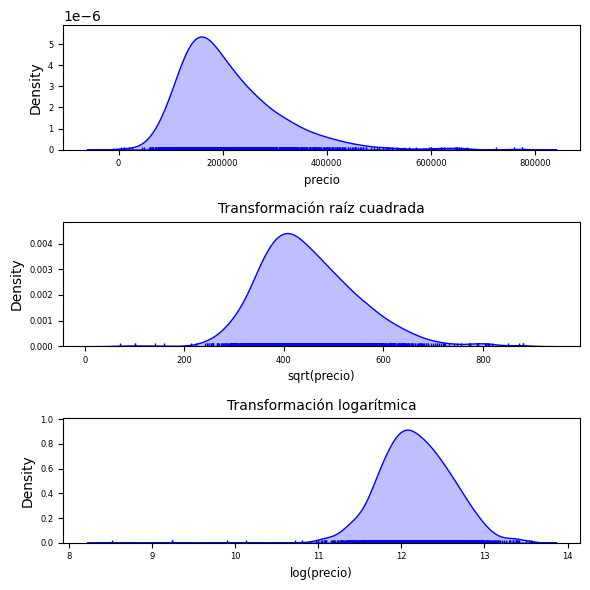

In [ ]:
#En la primera línea, se crea una figura (fig) y un conjunto de tres ejes (axes) utilizando la función subplots de Matplotlib. Se especifica que se crearán tres filas (nrows=3) y una columna (ncols=1) de ejes, y se establece el tamaño de la figura en 6 pulgadas de ancho por 6 pulgadas de alto (figsize=(6,6)).
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
#En las siguientes líneas, se traza la distribución original de los precios. Se utiliza la función kdeplot de Seaborn para trazar una estimación de la densidad de kernel de los precios (datos.precio). Se especifica que se desea que el área bajo la curva sea coloreada (fill=True) en color azul (color='blue') y se traza en el primer eje (ax=axes[0]). Luego, se utiliza la función rugplot de Seaborn para trazar pequeñas marcas a lo largo del eje x en la posición de cada punto de datos. Esto se hace para resaltar la densidad de puntos en diferentes partes de la distribución. Los puntos son marcados en color azul (color='blue') y se trazan en el primer eje (ax=axes[0]).
transforms = [("", datos.precio),("Transformación raíz cuadrada", np.sqrt(datos.precio)),("Transformación logarítmica", np.log(datos.precio))]
# A continuación, se establecen las etiquetas de título, etiqueta de eje x y tamaño de fuente para el primer eje. Se utiliza el método set_title del primer eje (axes[0].set_title) para establecer el título de la gráfica en "Distribución original", con un tamaño de fuente de "medium" (fontsize='medium'). El método set_xlabel del primer eje (axes[0].set_xlabel) establece la etiqueta del eje x como "precio", con un tamaño de fuente de "small" (fontsize='small'). Finalmente, se utiliza el método tick_params del primer eje (axes[0].tick_params) para establecer el tamaño de la fuente de las marcas en el eje x en 6 (labelsize=6).

for i, (title, transform) in enumerate(transforms):
    sns.kdeplot(
        transform,
        fill    = True,
        color   = "blue",
        ax      = axes[i]
    )
    sns.rugplot(
        transform,
        color   = "blue",
        ax      = axes[i]
    )
    #Para cada fila, se establecen las etiquetas de título, etiqueta de eje x y tamaño de fuente de manera similar al primer eje. Se utiliza el método set_title del eje correspondiente para establecer el título de la gráfica en "Transformación raíz cuadrada" o "Transformación logarítmica". Se utiliza el método set_xlabel del eje correspondiente para establecer la etiqueta del eje x como "sqrt(precio)" o "log(precio)", respectivamente. Y se utiliza el método tick_params del eje correspondiente para establecer el tamaño de la fuente de las marcas en el eje x en 6.
    axes[i].set_title(title, fontsize = 'medium')
    axes[i].set_xlabel('sqrt(precio)' if "raíz" in title else 'log(precio)' if "logar" in title else 'precio', fontsize='small') 
    axes[i].tick_params(labelsize = 6)

fig.tight_layout() # Finalmente, se utiliza el método tight_layout de la figura para ajustar automáticamente el espacio entre los ejes

# Variables numéricas

In [ ]:
# Variables numéricas
# ==============================================================================
datos.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


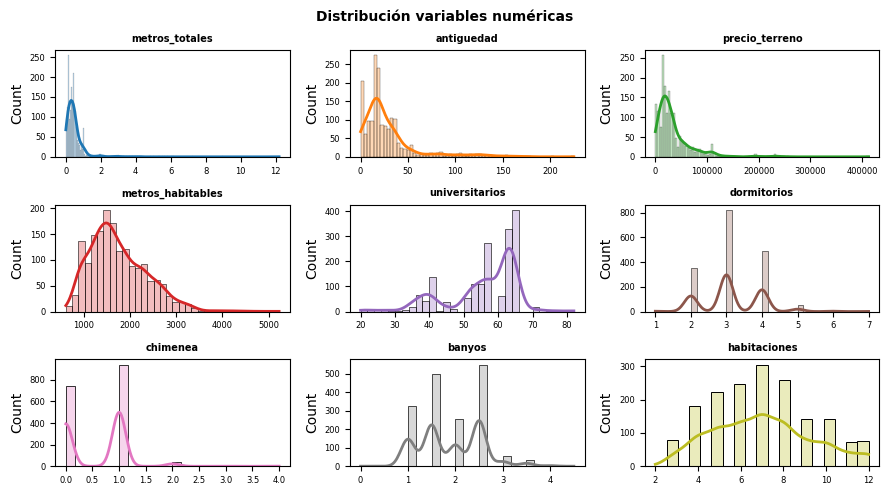

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5)) # Se especifica que habrá 3 filas y 3 columnas de subplots y que la figura tendrá un tamaño de 9 pulgadas de ancho por 5 pulgadas de alto.
axes = axes.flat # para convertir la matriz de subplots de 3x3 en una matriz unidimensional, lo que hace que sea más fácil iterar sobre cada uno de los subplots.
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns #  se seleccionan todas las columnas numéricas en el conjunto de datos 
columnas_numeric = columnas_numeric.drop('precio') # se elimina la columna 'precio' de la lista de columnas numérica
# La función enumerate() devuelve tanto el índice de la columna como el nombre de la columna en cada iteración.
for i, colum in enumerate(columnas_numeric): # se utiliza la función enumerate() para iterar sobre cada una de las columnas numéricas.
    sns.histplot(  # Para cada columna numérica, se utiliza la función sns.histplot() para trazar un histograma de la distribución de esa variable
        data     = datos,
        x        = colum,
        stat     = "count", # se utilizará para mostrar la altura del histograma
        kde      = True, #  se refiere a la densidad de la distribución
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2}, #  que especifica las características de la línea del histograma.
        alpha    = 0.3, # controlar la transparencia de las barras en el histograma
        ax       = axes[i] # es un parámetro que se utiliza para especificar los ejes en los que se va a trazar el histograma.
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout() # para ajustar automáticamente los subplots para que no se superpongan
plt.subplots_adjust(top = 0.9) # para ajustar manualmente la posición del título principal de la figura (suptitle) para que esté en el centro superior de la figura
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Seleccionar las columnas numéricas a graficar
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

# # Crear el gráfico de distribución apilado
# sns.histplot(
#     data = datos[columnas_numeric],
#     multiple = "stack",
#     kde = True,
#     alpha = 0.3,
#     linewidth = 2
# )

# # Ajustar los títulos y etiquetas
# plt.title('Distribución variables numéricas', fontsize = 10, fontweight = "bold")
# plt.xlabel("")
# plt.ylabel("")
# plt.tick_params(labelsize = 6)

# plt.show()

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [ ]:
# La variable chimenea, aunque es de tipo numérico, 
#apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [ ]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea.value_counts()

1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

In [ ]:
# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable respuesta precio. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

## Gráfico de distribución para cada variable numérica

Text(0.5, 0.98, 'Correlación con precio')

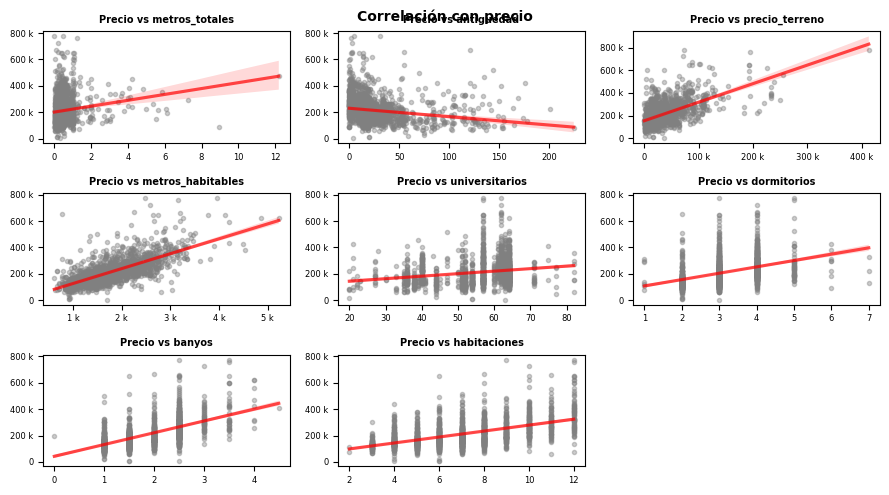

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas

#Seleccionamos las columnas numéricas y las almacenamos en columnas_numeric. También se excluye la columna "precio".
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns.drop('precio')
# Se especifica que habrá 3 filas y 3 columnas de subplots y que la figura tendrá un tamaño de 9 pulgadas de ancho por 5 pulgadas de alto.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat #convierte la matriz de sub-gráficos de nrows filas y ncols columnas en un arreglo unidimensional de longitud nrows*ncols, donde cada elemento es uno de los sub-gráficos

# enumerate: para obtener un contador en un bucle
for i, col in enumerate(columnas_numeric):
    sns.regplot(x=datos[col], y=datos['precio'], color="gray", marker='.', scatter_kws={"alpha":0.4}, line_kws={"color":"r", "alpha":0.7}, ax=axes[i])
    axes[i].set_title(f"Precio vs {col}", fontsize=7, fontweight="bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter()) #que formatea el eje en notación científica con la potencia de diez 
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Eliminamos el eje vacío en la última posición del arreglo de ejes con delaxes.
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
fig.suptitle('Correlación con precio', fontsize=10, fontweight="bold")


# Correlación variables numéricas

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

# El objetivo de este código es tomar una matriz de correlación de pandas, donde cada fila y columna representa una variable numérica, 
#y convertirla en una versión "ordenada" de esa matriz, donde cada fila representa una pareja de variables y su coeficiente de correlación. 
#La tabla ordenada se devuelve como una nueva matriz de pandas.
def tidy_corr_matrix(corr_mat): #que toma como argumento una matriz de correlación de pandas llamada corr_mat.
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index() # onvertirla en un objeto Series de pandas, lo que significa que las filas y columnas de la matriz se convierten en una sola columna
    corr_mat.columns = ['variable_1','variable_2','r'] #Esta línea renombra las columnas del DataFrame resultante para que sean más legibles
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :] # Esta línea elimina las filas de la matriz original donde variable_1 es igual a variable_2, lo que significa que se eliminan todas las correlaciones perfectas, ya que una variable no puede estar perfectamente correlacionada consigo misma.
    corr_mat['abs_r'] = np.abs(corr_mat['r']) #Esta línea crea una nueva columna en el DataFrame que contiene los valores absolutos de los coeficientes de correlación
    corr_mat = corr_mat.sort_values('abs_r', ascending=False) # resultante en orden descendente según los valores absolutos de los coeficientes de correlación
    
    return(corr_mat) #Esta línea devuelve la tabla "ordenada" resultante como una matriz de pandas.

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson') #Esta línea utiliza el método select_dtypes() de pandas para seleccionar solo las columnas numéricas de un DataFrame llamado datos, y luego calcula la matriz de correlación utilizando el método corr() con el método pearson como método de cálculo. El resultado se almacena en una variable llamada corr_matrix.
tidy_corr_matrix(corr_matrix).head(10) # para obtener las primeras 10 filas del objeto devuelto por la función tidy_corr_matrix().

,variable_1,variable_2,r,abs_r
44,metros_habitables,habitaciones,0.733666,0.733666
76,habitaciones,metros_habitables,0.733666,0.733666
67,banyos,metros_habitables,0.718564,0.718564
43,metros_habitables,banyos,0.718564,0.718564
36,metros_habitables,precio,0.712390,0.712390
4,precio,metros_habitables,0.712390,0.712390
78,habitaciones,dormitorios,0.671863,0.671863
62,dormitorios,habitaciones,0.671863,0.671863
42,metros_habitables,dormitorios,0.656196,0.656196
58,dormitorios,metros_habitables,0.656196,0.656196


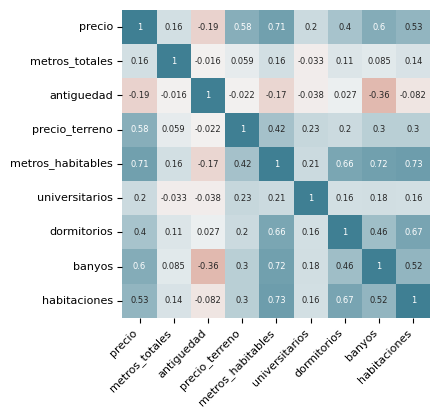

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

# Variables cualitativas

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


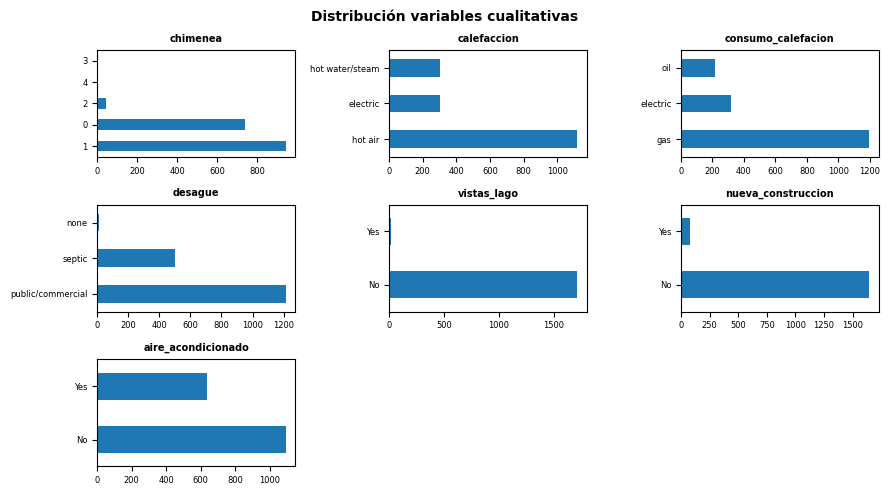

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

Eliminar las observaciones del grupo minoritario si es una variable multiclase.

Eliminar la variable si solo tiene dos niveles.

Agrupar los niveles minoritarios en un único grupo.

Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

Para este caso, hay que tener precaución con la variable chimenea. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [ ]:
datos.chimenea.value_counts().sort_index() #  para contar el número de veces que aparece cada valor único en la columna 'chimenea.

0    740
1    942
2     42
3      2
4      2
Name: chimenea, dtype: int64

In [ ]:
#En la primera línea, se crea un diccionario llamado 'dic_replace' 
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}
#
datos['chimenea'] = (
    datos['chimenea']
    .map(dic_replace) #de pandas para aplicar el diccionario 'dic_replace' a la columna 'chimenea'.
    .fillna(datos['chimenea']) # fillna() de pandas para llenar los valores nulos en la columna 'chimenea' con los valores originales de la columna 'chimenea'. Esto es importante porque el método map() convierte automáticamente los valores que no se encuentran en el diccionario en valores nulos, por lo que esta línea de código garantiza que todos los valores en la columna 'chimenea' sean reemplazados por los valores correctos del diccionario.
)

In [ ]:
datos.chimenea.value_counts().sort_index()

0        740
1        942
2_mas     46
Name: chimenea, dtype: int64

## Gráfico de distribución para cada variable cualitativas

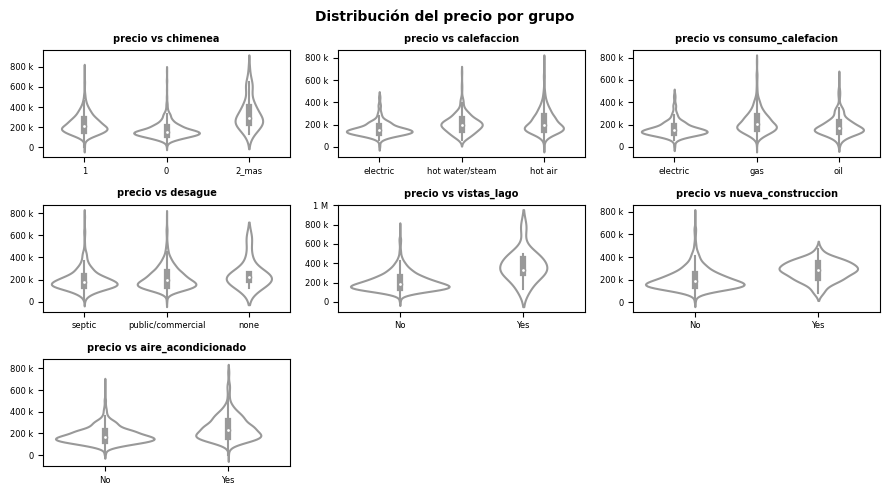

In [ ]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

# División train y test

In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

#La función train_test_split toma como argumentos los datos de entrada (en este caso, el conjunto de datos datos), así como la columna objetivo (precio) que se desea predecir. 
# X_train y y_train son los datos de entrenamiento, que se utilizarán para entrenar el modelo
# X_test e y_test son los datos de prueba, que se utilizarán para evaluar el rendimiento del modelo.
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'), # Los datos del conjunto de características X, que se obtienen a partir del conjunto de datos datos eliminando la columna objetivo precio a lo largo del eje de columnas (axis=columns).
                                        datos['precio'], #Los datos de la columna objetivo y, que se extraen directamente del conjunto de datos datos.
                                        train_size   = 0.8, #También se especifica el tamaño del conjunto de entrenamiento (train_size = 0.8), lo que significa que el 80% de los datos se utilizarán para entrenar el modelo y el 20% restante se utilizará para evaluarlo.
                                        random_state = 1234,# se utiliza para asegurar que se obtengan los mismos resultados cada vez que se ejecute el código, ya que fija la semilla del generador de números aleatorios.
                                        shuffle      = True #lo que significa que los datos se barajearán antes de dividirse en los conjuntos de entrenamiento y test.
                                    )

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el repart

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [ ]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


# Preprocesado --- Importante 
El preprocesado engloba todas aquellas transformaciones realizadas sobre los datos con el objetivo que puedan ser interpretados por el algoritmo de machine learning lo más eficientemente posible. Todo preprocesado de datos debe aprenderse con las observaciones de entrenamiento y luego aplicarse al conjunto de entrenamiento y al de test  Esto es muy importante para no violar la condición de que ninguna información procedente de las observaciones de test participe o influya en el ajuste del modelo. Este principio debe aplicarse también si se emplea validación cruzada (ver más adelante). En tal caso, el preprocesado debe realizarse dentro de cada iteración de validación, para que las estimaciones que se hacen con cada partición de validación no contengan información del resto de particiones. Aunque no es posible crear un único listado, a continuación se resumen algunos de los pasos de preprocesado que más se suelen necesitar.

## Imputación de valores ausentes

La gran mayoría de algoritmos no aceptan observaciones incompletas, por lo que, cuando el set de datos contiene valores ausentes, se puede:

Eliminar aquellas observaciones que estén incompletas.

Eliminar aquellas variables que contengan valores ausentes.

Tratar de estimar los valores ausentes empleando el resto de información disponible (imputación).

Las primeras dos opciones, aunque sencillas, suponen perder información. La eliminación de observaciones solo puede aplicarse cuando se dispone de muchas y el porcentaje de registros incompletos es muy bajo. En el caso de eliminar variables, el impacto dependerá de cuánta información aporten dichas variables al modelo. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que se corre al introducir valores en predictores que tengan mucha influencia en el modelo. Supóngase un estudio médico en el que, cuando uno de los predictores es positivo, el modelo predice casi siempre que el paciente está sano. Para un paciente cuyo valor de este predictor se desconoce, el riesgo de que la imputación sea errónea es muy alto, por lo que es preferible obtener una predicción basada únicamente en la información disponible. Esta es otra muestra de la importancia que tiene que el analista conozca el problema al que se enfrenta y pueda así tomar la mejor decisión.

El módulo sklearn.impute incorpora varios métodos de imputación distintos:

SimpleImputer: permite imputaciones empleando un valor constante o un estadístico (media, mediana, valor más frecuente) de la misma columna en la que se encuentra el valor ausente.

IterativeImputer: permite imputar el valor de una columna teniendo en cuenta el resto de columnas. En concreto, se trata de un proceso iterativo en el que, en cada iteración, una de las variables se emplea como variable respuesta y el resto como predictores. Una vez obtenido el modelo, se emplea para predecir las posiciones vacías de esa variable. Este proceso se lleva a cabo con cada variable y se repite el ciclo max_iter veces para ganar estabilidad. La implementación de sklearn.impute.IterativeImputer permite que se emplee casi cualquiera de sus algoritmos para crear los modelos de imputación (KNN, RandomForest, GradientBoosting...).

KNNImputer: es un caso concreto de IterativeImputer en el que se emplea k-Nearest Neighbors como algoritmo de imputación.

A pesar de ser un método muy utilizado, imputar utilizando KNN presenta dos problemas: su coste computacional elevado hace que solo sea aplicable en conjuntos de datos de tamaño pequeño o moderado. Si hay variables categóricas, debido a la dificultad de medir "distancias" en este contexto, puede dar lugar a resultados poco realistas. Por estas dos razones, es más recomendable utilizar un modelo tipo Random Forest IterativeImputer(predictor = RandomForestRegressor()).

Con el argumento add_indicator=True se crea automáticamente una nueva columna en la que se indica con el valor 1 qué valores han sido imputados. Esto puede ser útil tanto para identificar las observaciones en las que se ha realizado alguna imputación como para utilizarla como un predictor más en el modelo.

## Exclusión de variables con varianza próxima a cero

No se deben incluir en el modelo predictores que contengan un único valor (cero-varianza) ya que no aportan información. Tampoco es conveniente incluir predictores que tengan una varianza próxima a cero, es decir, predictores que toman solo unos pocos valores, de los cuales, algunos aparecen con muy poca frecuencia. El problema con estos últimos es que pueden convertirse en predictores con varianza cero cuando se dividen las observaciones por validación cruzada o bootstrap.

La clase VarianceThreshold del módulo sklearn.feature_selection identifica y excluye todos aquellos predictores cuya varianza no supera un determinado threshold. En el caso de variables cualitativas, cabe recordar que scikitlearn requiere que se binaricen (one hot encoding o dummy) para poder entrenar los modelos. Una variable booleana sigue una distribución de Bernoulli, por lo que su varianza puede ser calculada como:
Var[X]=p(1−p)
 
Si bien la eliminación de predictores no informativos podría considerarse un paso propio del proceso de selección de predictores, dado que consiste en un filtrado por varianza, tiene que realizarse antes de estandarizar los datos, ya que después, todos los predictores tienen varianza 1.

## Estandarización y escalado de variables numéricas


Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Muchos algoritmos de machine learning (SVM, redes neuronales, lasso...) son sensibles a esto, de forma que, si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta. Existen principalmente 2 estrategias para evitarlo:

Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen. StandardScaler(with_std=False)
Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. Hay dos formas de lograrlo:

Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

z=x−μσ
 
Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

Xnorm=X−XminXmax−Xmin
 
Nunca se deben estandarizar las variables después de ser binarizadas (ver a continuación).

## Binarización de las variables cualitativas

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.

Por defecto, la clase OneHotEncoder binariza todas las variables, por lo que hay que aplicarlo únicamente a las variables cualitativas (ver como hacerlo en el apartado ColumnTransformer). Con el argumento drop=‘first’ se elimina uno de los niveles para evitar redundancias. Volviendo al ejemplo anterior, no es necesario almacenar las tres variables, ya que, si color_rojo y color_verde toman el valor 0, la variable color_azul toma necesariamente el valor 1. Si color_rojo o color_verde toman el valor 1, entonces color_azul es necesariamente 0. Esto es importante en modelos que sufren problemas si los predictores están perfectamente correlacionados (modelos lineales sin regularización, redes neuronales...).

En ciertos escenarios puede ocurrir que, en los datos de test, aparezca un nuevo nivel que no estaba en los datos de entrenamiento. Si no se conoce de antemano cuáles son todos los posibles niveles, se puede evitar errores en las predicciones indicando OneHotEncoder(handle_unknown='ignore').

La forma de preprocesar los datos dentro del ecosistema scikit-learn es empleando los ColumnTransformer y pipeline. Además de las ya mencionadas, pueden encontrarse muchas más transformaciones de preprocesado en el módulo sklearn.preprocessing.

## Pipeline y ColumnTransformer

Las clases ColumnTransformer y make_column_transformer del módulo sklearn.compose permiten combinar múltiples transformaciones de preprocesado, especificando a qué columnas se aplica cada una. Como todo transformer, tiene un método de entrenamiento (fit) y otro de transformación (transform) . Esto permite que el aprendizaje de las transformaciones se haga únicamente con observaciones de entrenamiento, y se puedan aplicar después a cualquier conjunto de datos. La idea detrás de este módulo es la siguiente:

Definir todas las transformaciones (escalado, selección, filtrado...) que se desea aplicar y a qué columnas ColumnTransformer(). La selección de columnas puede hacerse por: nombre. índice, máscara booleana, slice, patrón regex, por tipo de columna o con las funciones de selección make_column_selector.

Aprender los parámetros necesarios para dichas transformaciones con las observaciones de entrenamiento .fit().

Aplicar las transformaciones aprendidas a cualquier conjunto de datos .transform().

### Nota Importante: Jefer no se hizo imputación de valores ausentes por que los datos estan completos, es decir, no hay NULOS

In [ ]:
# Este código utiliza la biblioteca Scikit-learn (también conocida como sklearn) de Python para preprocesar
# los datos antes de entrenar un modelo de aprendizaje automático. El objetivo de este
# preprocesamiento es preparar los datos para que puedan ser utilizados de manera efectiva por el modelo.
# ==============================================================================
from sklearn.compose import ColumnTransformer # se utiliza para transformar un conjunto de columnas de un DataFrame
from sklearn.preprocessing import OneHotEncoder #son dos transformadores de columna específicos.
from sklearn.preprocessing import StandardScaler #son dos transformadores de columna específicos.
from sklearn.compose import make_column_selector # es una función auxiliar que permite seleccionar fácilmente las columnas de un DataFrame basándose en su tipo de datos.


#En esta sección, se seleccionan las columnas numéricas y las columnas categóricas del conjunto de entrenamiento X_train. 
# Las columnas numéricas se identifican mediante el método select_dtypes que selecciona columnas basadas en su tipo de datos. 
# En este caso, las columnas numéricas se seleccionan si tienen un tipo de dato igual a 'float64' o 'int'. 
# El resultado de esta selección se almacena en la lista numeric_cols. Las columnas categóricas se seleccionan de manera similar,
#  pero se buscan los tipos de datos 'object' y 'category'. El resultado se almacena en la lista cat_cols.

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list() # Columnas numéricas se seleccion
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list() # columunas categóricas se seleccion

# En esta sección, se crea un objeto ColumnTransformer llamado preprocessor. Este objeto se utiliza para aplicar diferentes 
# transformaciones a diferentes columnas del conjunto de datos. El argumento de entrada para ColumnTransformer es una lista de tuplas, 
# donde cada tupla contiene el nombre de la transformación, el transformador que se va a utilizar y las columnas que se deben transformar.
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols), #la primera transformación se llama 'scale' y se aplica a las columnas numéricas. Esta transformación utiliza StandardScaler para estandarizar las columnas numéricas
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)], #Esta transformación utiliza OneHotEncoder para convertir las columnas categóricas en columnas binarias
                remainder='passthrough') #El argumento remainder='passthrough' le dice a ColumnTransformer que las columnas que no se han transformado deben ser pasadas directamente al modelo sin ningún cambio.

In [ ]:
#La primera línea de código preprocessor.fit_transform(X_train) se utiliza para ajustar y transformar el conjunto de entrenamiento X_train. 
# El método fit_transform() ajusta los transformadores a los datos de entrenamiento y los aplica para transformar los datos. 
# En este caso, fit_transform() aplica las transformaciones definidas en preprocessor a X_train y devuelve los datos transformados, 
#que se almacenan en la variable X_train_prep.
X_train_prep = preprocessor.fit_transform(X_train)

# La segunda línea de código preprocessor.transform(X_test) se utiliza para transformar el conjunto de prueba X_test. 
# El método transform() se utiliza después de ajustar los transformadores a los datos de entrenamiento y aplica la misma 
# transformación a los datos de prueba. En este caso, transform() aplica las mismas transformaciones definidas en preprocessor a X_test y
# devuelve los datos transformados, que se almacenan en la variable X_test_prep.
X_test_prep  = preprocessor.transform(X_test)

Por defecto, el resultado devuelto por ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
# se utiliza para obtener los nombres de las nuevas columnas después de aplicar la transformación de one-hot-encoding a las columnas categóricas
#El método get_feature_names_out() se utiliza para obtener los nombres de las nuevas columnas, y se aplica a las columnas categóricas (cat_cols) que fueron transformadas por el 
#transformador OneHotEncoder y que fueron nombradas con el identificador 'onehot' en el objeto preprocessor.
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
nombre_columnas = np.concatenate([numeric_cols, encoded_cat]) #se utiliza para concatenar los nombres de las columnas
X_train_prep = preprocessor.transform(X_train) 
X_train_prep = pd.DataFrame(X_train_prep, columns=nombre_columnas) #se utiliza para crear un nuevo DataFrame
X_train_prep.head(3) #El nuevo DataFrame se almacena en la variable X_train_prep.

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,chimenea_2_mas,calefaccion_electric,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_electric,consumo_calefacion_gas,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


# Pipeline
ColumnTransformer aplica las operaciones de forma paralela, no de forma secuencial, esto significa que no permite aplicar más de una transformación a una misma columna. En el caso de que sea necesario hacerlo, hay que recurrir a los pipeline, que también agrupan operaciones pero las ejecutan de forma secuencial, de forma que la salida de una operación es la entrada de la siguiente. Si se quieren aplicar varias transformaciones de preprocesado sobre una misma columna, es necesario agruparlas primero en un pipeline

In [ ]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.pipeline import Pipeline # Una clase que te permite aplicar de forma secuencial una lista de transformaciones y un estimador final a un conjunto de datos.
from sklearn.compose import ColumnTransformer #Una clase que te permite aplicar diferentes transformaciones a diferentes columnas de un conjunto de datos.
from sklearn.impute import SimpleImputer #Un transformador para completar los valores faltantes en un conjunto de datos. Reemplaza los valores faltantes con la media, mediana o valor más frecuente de la característica (columna) según el parámetro strategy.
from sklearn.preprocessing import OneHotEncoder # n transformador para codificar variables categóricas
from sklearn.preprocessing import StandardScaler #: Un transformador que estandariza las características (columnas) de un conjunto de datos para que tengan media cero y varianza unitaria.
from sklearn.compose import make_column_selector # Una función que permite seleccionar columnas específicas de un conjunto de datos basado en un patrón de nombre o tipo de dato de la columna.
# ==============================================================================
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list() # contendrá los nombres de las columnas numéricas de X_train,
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list() #mientras que cat_cols contendrá los nombres de las columnas categóricas.

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')), #para reemplazar los valores faltantes en las columnas numéricas con la mediana de cada columna 
                            ('scaler', StandardScaler()) # para estandarizar las columnas numéricas, restando la media de cada columna y dividiéndola por su desviación estándar. Esto asegura que cada columna tenga media cero y varianza unitaria
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')), #para reemplazar los valores faltantes en las columnas categóricas con el valor más frecuente de cada columna 
                                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) #para convertir cada columna categórica en múltiples columnas binarias
                            ]
                          )
#que se aplicarán a las columnas numéricas y categóricas de un conjunto de datos:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols), #Utiliza el transformador numeric_transformer definido previamente para preprocesar las columnas numéricas.
                        ('cat', categorical_transformer, cat_cols) # Utiliza el transformador categorical_transformer definido previamente para preprocesar las columnas categóricas
                    ],
                    remainder='passthrough', # Esto significa que cualquier columna que no sea numérica ni categórica (ya que estas columnas ya están siendo procesadas por los transformadores) se pasará directamente al conjunto de datos preprocesado sin ser procesada
                    verbose_feature_names_out = False #para que los nombres de las columnas no sean modificados durante el preprocesamiento.
               ).set_output(transform="pandas") #para especificar que el preprocesador debe devolver un DataFrame de pandas como salida.


# fit_transform se utiliza en el conjunto de datos de entrenamiento X_train para ajustar el preprocesador preprocessor a los datos y
# transformarlos simultáneamente. Esto significa que se calculan todas las estadísticas necesarias para el preprocesamiento 
# (por ejemplo, la media y la desviación estándar para la estandarización) utilizando solo los datos de entrenamiento, 
# y luego se aplica el preprocesamiento a los datos de entrenamiento y de prueba.
X_train_prep = preprocessor.fit_transform(X_train)

# transform se utiliza en el conjunto de datos de prueba X_test para aplicar el preprocesamiento a estos datos utilizando las estadísticas 
# calculadas durante el fit_transform del conjunto de entrenamiento X_train. De esta manera, el conjunto de prueba se preprocesa de la misma 
# manera que el conjunto de entrenamiento, lo que garantiza que se apliquen las mismas transformaciones a ambos conjuntos.
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train) #Este método se utiliza para ajustar el preprocesador a los datos de entrenamiento y transformarlos al mismo tiempo
X_test_prep  = preprocessor.transform(X_test) #Aquí, el preprocesador utiliza los ajustes aprendidos de los datos de entrenamiento y los aplica a los datos de prueba para realizar la transformación
X_train_prep.head(3)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,chimenea_2_mas,calefaccion_electric,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_electric,consumo_calefacion_gas,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])],
                  verbose_feature_names_out=False)

In [ ]:
# lo que significa que los modelos y transformadores se representarán como una lista de sus parámetros y argumentos en lugar de un diagrama de flujo.
set_config(display='text')

# Crear un modelo

## Entrenamiento

In [ ]:
from sklearn.linear_model import Ridge

# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

## Validación

In [ ]:
# Validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score 

# Esta función nos permitirá realizar la validación cruzada en nuestro modelo.
cv_scores = cross_val_score(
                estimator = pipe, # El estimador del modelo que se utilizará en la validación cruzada.
                X         = X_train, # Los datos de características de entrenamiento X_train
                y         = y_train, #Los datos de etiquetas de entrenamiento y_train.
                scoring   = 'neg_root_mean_squared_error', #representa el error cuadrático medio negativo de la raíz.
                cv        = 5 # 5, lo que significa que se realizará una validación cruzada de 5 pliegues
            )
#El resultado se guarda en la variable cv_scores, que contendrá los puntajes de validación cruzada para cada pliegue.

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-53936.97817183 -53076.74364513 -62746.15219054 -65963.09754244
 -48929.66260476]
Média métricas de validación cruzada: -56930.52683094097


In [ ]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
            )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-66487.72274814 -56333.87119132 -48992.85039086 -55030.00923381
 -58790.48472729 -62651.67080028 -55779.2103529  -61820.5882113
 -57243.1819794  -48910.70385765 -50033.46929956 -51586.8240037
 -62478.2206031  -65111.86204296 -54900.98944223 -64220.39882006
 -53694.93490461 -64690.99877883 -51242.27642488 -52330.80605289
 -56777.05219272 -58644.60923875 -55573.25900549 -64350.25804164
 -50578.15339623]

Média métricas de validación cruzada: -57130.17622962478


In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.021458,0.013850,0.632359,0.679758,-64605.636258,-51789.256510
1,0.016486,0.011235,0.718708,0.636812,-48322.428406,-59983.019196
2,0.015748,0.009579,0.595874,0.689939,-58434.926618,-55213.669996
3,0.016062,0.012100,0.672969,0.655316,-58179.173708,-55331.536238
4,0.019136,0.010502,0.615521,0.683390,-60148.310664,-54366.426683
5,0.018456,0.009587,0.650829,0.664771,-53812.579173,-57561.184588
6,0.027040,0.009763,0.698178,0.647441,-49813.241120,-59221.407345
7,0.013024,0.008591,0.646554,0.673016,-61749.477863,-53221.315710
8,0.008852,0.010176,0.615151,0.682999,-59192.994923,-54895.180113
9,0.014530,0.010086,0.645685,0.670425,-61061.033083,-53843.654748


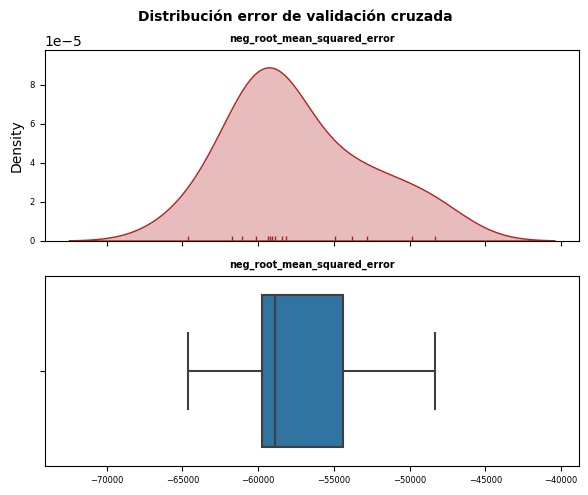

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.kdeplot(
    cv_scores['test_neg_root_mean_squared_error'],
    fill    = True,
    alpha   = 0.3,
    color   = "firebrick",
    ax      = axes[0]
)
sns.rugplot(
    cv_scores['test_neg_root_mean_squared_error'],
    color   = "firebrick",
    ax      = axes[0]
)
axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    x  = cv_scores['test_neg_root_mean_squared_error'],
    ax = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

C:\Users\Jef\AppData\Local\Temp\ipykernel_2620\2959059548.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot(
c:\Users\Jef\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

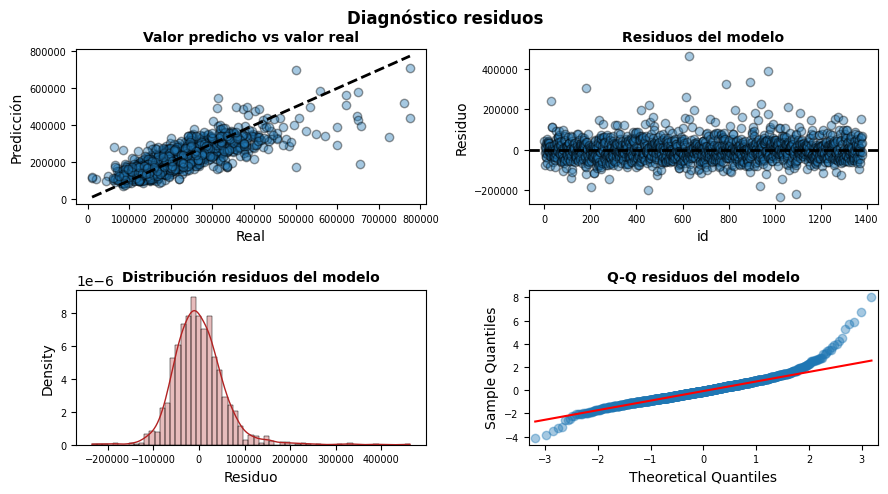

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                 )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'k--', color = 'black', lw=2
)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
            )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -56735.77500472445


# Predicción

In [ ]:
predicciones = pipe.predict(X_test)

In [ ]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,precio,prediccion
903,105000,112491.665253
208,113000,185142.195564
358,110500,168900.516039
1187,159000,139333.302565
319,215000,236967.476884


In [ ]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

65372.91638923963

# Hiperparámetros
Muchos modelos, entre ellos la regresión lineal con regularización Ridge, contienen parámetros que no pueden aprenderse a partir de los datos de entrenamiento y, por lo tanto, deben de ser establecidos por el analista. A estos se les conoce como hiperparámetros. Los resultados de un modelo pueden depender en gran medida del valor que tomen sus hiperparámetros, sin embargo, no se puede conocer de antemano cuál es el adecuado. Aunque con la práctica, los especialistas en machine learning ganan intuición sobre qué valores pueden funcionar mejor en cada problema, no hay reglas fijas. La forma más común de encontrar los valores óptimos es probando diferentes posibilidades

## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipe: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)} #  En este caso, se está ajustando el hiperparámetro modelo__alpha del estimador pipe. Se probarán 10 valores entre 10^-5 y 10^3 en escala logarítmica

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe, #contiene el modelo y cualquier preprocesamiento necesario.
        param_grid = param_grid,#El diccionario de hiperparámetros a ajustar.
        scoring    = 'neg_root_mean_squared_error', #La métrica de evaluación utilizada para comparar diferentes combinaciones de hiperparámetros
        n_jobs     = multiprocessing.cpu_count() - 1, #El número de trabajos en paralelo para ejecutar durante la búsqueda de hiperparámetros
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), #con 5 divisiones y 5 repeticiones, lo que implica una validación cruzada repetida de 5x5 = 25 veces en total
        verbose    = 0, #Controla la cantidad de información impresa durante la búsqueda. En este caso, se utiliza 0 para desactivar la impresión
        return_train_score = True #True para que se devuelvan los puntajes de entrenamiento.
       )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

In [ ]:
# Resultados del grid
# ==============================================================================
# Este DataFrame contendrá información sobre los hiperparámetros probados, los puntajes de evaluación y otras métricas relacionadas con la búsqueda.
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,2.154435,-57090.488196,4338.576482,-55915.485065,1086.785621
5,0.278256,-57123.761255,4366.544704,-55902.775157,1087.654406
4,0.035938,-57130.793637,4370.809005,-55902.514274,1087.672330
3,0.004642,-57131.759310,4371.373249,-55902.509795,1087.672637
2,0.000599,-57131.885020,4371.446356,-55902.509720,1087.672643
1,0.000077,-57131.901272,4371.455802,-55902.509719,1087.672643
0,0.00001,-57131.903372,4371.457022,-55902.509719,1087.672643
7,16.681005,-57202.553988,4233.965740,-56172.906957,1071.258567
8,129.154967,-58115.746711,4019.527703,-57355.405386,1028.874191
9,1000.0,-62689.534258,4215.345976,-62383.273356,953.333440


In [ ]:
import pandas as pd

def get_search_results(grid):
    resultados = pd.DataFrame(grid.cv_results_)
    resultados_filtrados = resultados.filter(regex='(param.*|mean_t|std_t)').drop(columns='params')
    resultados_ordenados = resultados_filtrados.sort_values('mean_test_score', ascending=False)
    return resultados_ordenados

In [ ]:
resultados = get_search_results(grid)
resultados

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,2.154435,-57090.488196,4338.576482,-55915.485065,1086.785621
5,0.278256,-57123.761255,4366.544704,-55902.775157,1087.654406
4,0.035938,-57130.793637,4370.809005,-55902.514274,1087.672330
3,0.004642,-57131.759310,4371.373249,-55902.509795,1087.672637
2,0.000599,-57131.885020,4371.446356,-55902.509720,1087.672643
1,0.000077,-57131.901272,4371.455802,-55902.509719,1087.672643
0,0.00001,-57131.903372,4371.457022,-55902.509719,1087.672643
7,16.681005,-57202.553988,4233.965740,-56172.906957,1071.258567
8,129.154967,-58115.746711,4019.527703,-57355.405386,1028.874191
9,1000.0,-62689.534258,4215.345976,-62383.273356,953.333440


In [ ]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': 2.154434690031882} : -57090.4881964799 (neg_root_mean_squared_error)


KeyError: "None of [Index(['split0_train_score', 'split1_train_score', 'split2_train_score',\n       'split3_train_score', 'split4_train_score', 'split5_train_score',\n       'split6_train_score', 'split7_train_score', 'split8_train_score',\n       'split9_train_score', 'split10_train_score', 'split11_train_score',\n       'split12_train_score', 'split13_train_score', 'split14_train_score',\n       'split15_train_score', 'split16_train_score', 'split17_train_score',\n       'split18_train_score', 'split19_train_score', 'split20_train_score',\n       'split21_train_score', 'split22_train_score', 'split23_train_score',\n       'split24_train_score'],\n      dtype='object')] are in the [columns]"

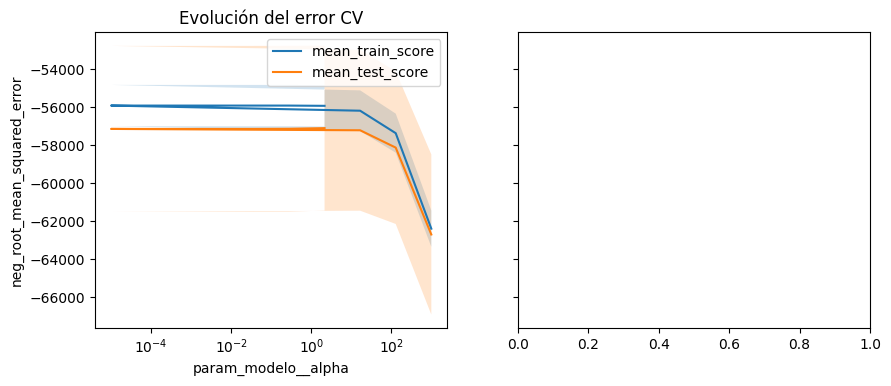

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.84), sharey=True)

# Gráfico 1
# ------------------------------------------------------------------------------
resultados.plot('param_modelo__alpha', 'mean_train_score', ax=axes[0])
resultados.plot('param_modelo__alpha', 'mean_test_score', ax=axes[0])
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Evolución del error CV')
axes[0].set_ylabel('neg_root_mean_squared_error');

# Gráfico 2
# ------------------------------------------------------------------------------
numero_splits = grid.n_splits_

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_train_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'blue', 
    ax    = axes[1]
)

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_test_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'red', 
    ax    = axes[1]
)

axes[1].legend(
    (axes[1].get_children()[0], axes[1].get_children()[numero_splits]),
    ('training scores', 'test_scores')
)
axes[1].set_xscale('log')
axes[1].set_title('Evolución del error CV')
axes[1].set_ylabel('neg_root_mean_squared_error');

fig.tight_layout()

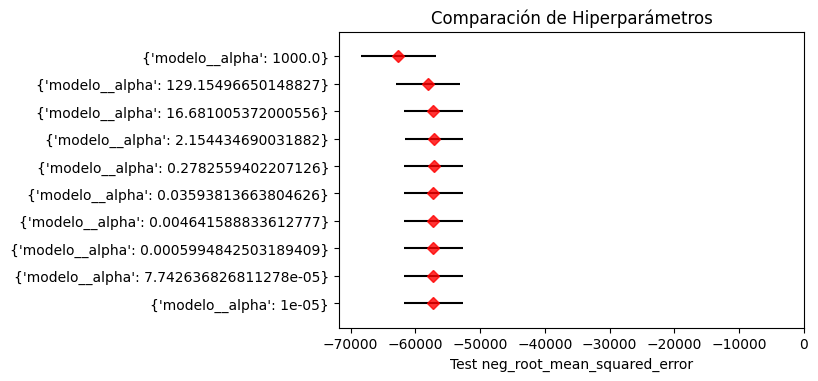

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

## Random grid search

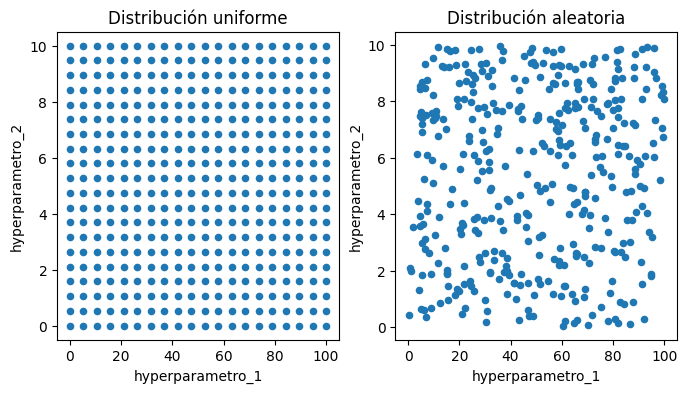

In [ ]:
from itertools import product
import random

fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4),
                        sharex = True, sharey = False)

# Grid exhaustivo
# ==============================================================================
hyperparametro_1 = np.linspace(start = 0, stop = 100, num=20)
hyperparametro_2 = np.linspace(start = 0, stop = 10, num=20)

# Lista con todas las combinaciones
combinaciones = [list(x) for x in product(hyperparametro_1, hyperparametro_2)]
combinaciones = pd.DataFrame.from_records(
                    combinaciones,
                    columns=['hyperparametro_1', 'hyperparametro_2']
                )

combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[0]
)
axs[0].set_title('Distribución uniforme')

# Grid aleatorio (random grid)
# ==============================================================================
hyperparametro_1 = np.random.uniform(low = 0, high = 100, size  = 400)
hyperparametro_2 = np.random.uniform(low = 0, high = 10, size  = 400)

combinaciones = pd.DataFrame(
                    {
                    'hyperparametro_1': hyperparametro_1,
                    'hyperparametro_2': hyperparametro_2,
                    }
                )
combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[1]
)
axs[1].set_title('Distribución aleatoria');

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
1,4.534879,-57127.988412,4316.199631,-55942.426866,1080.308236


## Optimización bayesiana

In [ ]:
# Búsqueda de hiperparámetros con scikit-optimize
# ==============================================================================
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

espacio_busqueda  = [Real(1e-6, 1e+3, "log-uniform", name='modelo__alpha')]

@use_named_args(espacio_busqueda)
def objective(**params):
    pipe.set_params(**params)
    return -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))

resultados_opt = gp_minimize(
                    func         = objective,
                    dimensions   = espacio_busqueda,
                    n_calls      = 50,
                    random_state = 0
                )

print(f"Mejor score validación: {resultados_opt.fun}")
print(f"Mejores hiperparámetros: {list(zip([x.name for x in espacio_busqueda], resultados_opt.x))}")

Mejor score validación: 56611.11311645104
Mejores hiperparámetros: [('modelo__alpha', 424.88341715522915)]


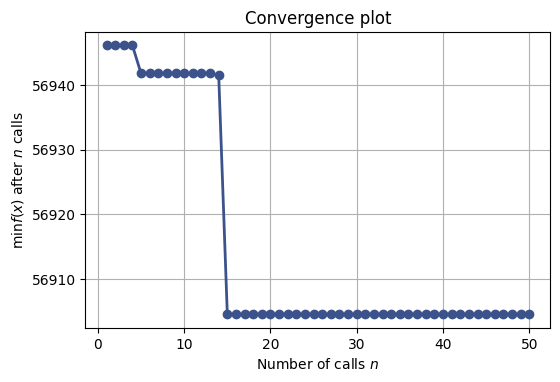

In [ ]:
# Evolución de la optimización
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
plot_convergence(resultados_opt, ax = ax);

In [ ]:
# Búsqueda de hiperparámetros con Optuna
# ==============================================================================
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    
    modelo__alpha = trial.suggest_float("modelo__alpha", 1e-6, 1e+3, log=True)
    pipe.set_params(**{'modelo__alpha':modelo__alpha})
    score = -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)
print(study.best_trial)
print("")
print(f"Mejor score validación: {study.best_value}")
print(f"Mejores hiperparámetros: {study.best_params}")

c:\Users\Jef\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
Best trial: 31. Best value: 56904.6: 100%|██████████| 50/50 [00:02<00:00, 19.47it/s]

FrozenTrial(number=31, state=1, values=[56904.58235948025], datetime_start=datetime.datetime(2023, 5, 10, 9, 7, 47, 2499), datetime_complete=datetime.datetime(2023, 5, 10, 9, 7, 47, 55604), params={'modelo__alpha': 4.882924126275644}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'modelo__alpha': FloatDistribution(high=1000.0, log=True, low=1e-06, step=None)}, trial_id=31, value=None)

Mejor score validación: 56904.58235948025
Mejores hiperparámetros: {'modelo__alpha': 4.882924126275644}


# Tuning del preprocesado - Grid

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer


# Pipe: preprocesado + modelo
# ==============================================================================

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Agregar imputación de valores faltantes
        ('scaler', StandardScaler())
    ]
)


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'interactions': [PolynomialFeatures(degree=2), 'passthrough'],
              'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_interactions,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
16,passthrough,2.154435,-57098.995082,4557.401764,-55910.70622,1182.382355


## Error # Tuning del preprocesado - Grid

In [ ]:
# Obtener las predicciones sobre los conjuntos X_test e y_test
y_test_pred1 = grid.predict(X_test)
# Calcular el RMSE sobre el conjunto de test
rmse_test = mean_squared_error(y_test, y_test_pred1, squared=False)
print(f"RMSE en test: {rmse_test:.2f}")

RMSE en test: 65388.04


## Predicción Tuning del preprocesado - Grid

In [ ]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_test_pred1})
df_predicciones.head()

,precio,prediccion
903,105000,112555.240256
208,113000,185180.239609
358,110500,168857.303444
1187,159000,139708.182566
319,215000,236854.223073


# Tuning del preprocesado - Optimización Bayesiana

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from skopt import BayesSearchCV
from numpy import logspace
import multiprocessing
import numpy as np
import pandas as pd
import optuna
import optuna.logging
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

optuna.logging.set_verbosity(optuna.logging.WARNING)


# Pipe: preprocesado + modelo
# ==============================================================================

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Agregar imputación de valores faltantes
        ('scaler', StandardScaler())
    ]
)

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline(
    [('preprocessing', preprocessor),
     ('interactions', PolynomialFeatures(degree=2)),
     ('modelo', Ridge())]
)

# Grid de hiperparámetros
# ==============================================================================
# Función objetivo para Optuna
def objective(trial):
    modelo__alpha = trial.suggest_float("modelo__alpha", 1e-6, 1e+3, log=True)
    pipe.set_params(**{'modelo__alpha': modelo__alpha})
    score = -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))
    return score


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_params = study.best_params
pipe.set_params(**best_params)

# Entrenamiento final con los mejores hiperparámetros
pipe.fit(X_train, y_train)

# Predicción y evaluación en el conjunto de prueba
y_test_pred = pipe.predict(X_test)
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(study.trials_dataframe())
resultados.filter(regex='(param.*|value|datetime_start|datetime_complete)') \
    .sort_values('value', ascending=False) \
    .head(1)



c:\Users\Jef\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
Best trial: 45. Best value: 56611.2: 100%|██████████| 50/50 [00:05<00:00,  9.49it/s]
c:\Users\Jef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,value,datetime_start,datetime_complete,params_modelo__alpha
17,86408.711456,2023-05-12 11:54:24.436957,2023-05-12 11:54:25.528430,0.000002


## Erores - Tuning del preprocesado - Optimización Bayesiana

In [ ]:
# Predicción y evaluación en el conjunto de prueba
y_test_pred = pipe.predict(X_test)
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
rmse_test

66745.85600404188

## Predicción - Tuning del preprocesado - Optimización Bayesiana

In [ ]:
# y_test_pred = pipe.predict(X_test)
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_test_pred})
df_predicciones.head()

,precio,prediccion
903,105000,117986.925809
208,113000,168270.072539
358,110500,159188.063841
1187,159000,180497.802168
319,215000,241291.983624


## Cuadro comparativo Grid vs optimización bayesiana

In [ ]:
## Cuadro comparativo Grid vs optimización bayesiana

import pandas as pd
from sklearn.metrics import mean_squared_error

# Predicciones utilizando Bayesiana
y_test_pred_bayes = pipe.predict(X_test)
rmse_test_bayes = np.sqrt(np.mean((y_test - y_test_pred_bayes) ** 2))
df_predicciones_bayes = pd.DataFrame({'precio': y_test, 'prediccion_Bayes': y_test_pred_bayes})

# Predicciones utilizando grid
y_test_pred_grid = grid.predict(X_test)
rmse_test_grid = mean_squared_error(y_test, y_test_pred_grid, squared=False)
df_predicciones_grid = pd.DataFrame({'precio': y_test, 'prediccion_grid': y_test_pred_grid})

# Unificar los resultados en un solo DataFrame
df_resultados = pd.concat([df_predicciones_bayes, df_predicciones_grid['prediccion_grid']], axis=1)

# DataFrame con los errores
df_errores = pd.DataFrame({'RMSE_Bayes': [rmse_test_bayes], 'RMSE_grid': [rmse_test_grid]})

# Imprimir los DataFrames
print("Resultados de las predicciones:")
print(df_resultados.head())

print("\nErrores (RMSE):")
print(df_errores)


Resultados de las predicciones:
      precio  prediccion_Bayes  prediccion_grid
903   105000     117986.925809    112555.240256
208   113000     168270.072539    185180.239609
358   110500     159188.063841    168857.303444
1187  159000     180497.802168    139708.182566
319   215000     241291.983624    236854.223073

Errores (RMSE):
     RMSE_Bayes     RMSE_grid
0  66745.856004  65388.043913


## Cuadro comparativo Grid vs optimización bayesiana - Diferencias

In [ ]:
import pandas as pd

df_resultados_organizados = pd.DataFrame({
    'Precio': df_resultados['precio'].astype(int),
    'Predicción Bayes': df_resultados['prediccion_Bayes'].astype(int),
    'Predicción Grid': df_resultados['prediccion_grid'].astype(int),
    'Diferencia Bayes': (df_resultados['precio'] - df_resultados['prediccion_Bayes']).astype(int),
    'Diferencia Grid': (df_resultados['precio'] - df_resultados['prediccion_grid']).astype(int)
})

# Crear función para resaltar valores negativos en rojo y positivos en azul
def resaltar_valores(val):
    color = 'red' if val < 0 else 'fuchsia'
    return f'color: {color}'

# Aplicar función de resaltado al DataFrame
df_resultados_estilizado = df_resultados_organizados.style.applymap(resaltar_valores, subset=['Diferencia Bayes', 'Diferencia Grid'])

# Imprimir las primeras 5 filas del DataFrame estilizado
# df_resultados_estilizado


# Algoritmos
En los siguientes apartados se entrenan diferentes modelos de machine learning con el objetivo de compararlos e identificar el que mejor resultado obtiene prediciendo el precio de las viviendas.



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Pipeline: preprocesado + modelos para el stacking
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y los modelos creando varios pipeline.
pipe_ridge = Pipeline([('preprocessing', preprocessor),
                     ('ridge', Ridge(alpha=3.4))])

pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(
                                         n_estimators = 1000,
                                         max_features = 7,
                                         max_depth    = 20
                                        )
                     )])

In [ ]:
# Definición y entrenamiento del StackingRegressor
#StackingRegressor, que es un modelo de aprendizaje automático que combina múltiples estimadores base y un estimador final para realizar predicciones
# ==============================================================================
estimators = [('ridge', pipe_ridge),
              ('random_forest', pipe_rf)]

# se crea una instancia del objeto StackingRegressor utilizando la función 
stacking_regressor = StackingRegressor(estimators=estimators, # Es la lista de estimadores base definida anteriormente
                                       final_estimator=RidgeCV()) #Especifica el estimador final que se utilizará para combinar las predicciones de los estimadores base. como estimador final, que es un modelo de regresión Ridge con validación cruzada incorporada para seleccionar el mejor valor de regularización
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = stacking_regressor.fit(X = X_train, y = y_train)
# En el código que has proporcionado, el resultado del entrenamiento se asigna a _, que es una convención comúnmente utilizada para indicar que el resultado no se va a utilizar. Esto evita que el resultado se imprima por pantalla.
# X_train: La matriz de características de entrenamiento, que contiene los datos de entrada utilizados para entrenar el modelo.
# y_train: El vector de etiquetas de entrenamiento, que contiene los valores objetivo correspondientes a los datos de entrada.

In [ ]:
# Error de test del stacking
# ==============================================================================
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking = mean_squared_error(
                    y_true  = y_test,
                    y_pred  = predicciones,
                    squared = False
                  )
print(f"El error (rmse) de test es: {rmse_stacking}")

El error (rmse) de test es: 60668.42209932754


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 65388.04391250898


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 65388.04391250898


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 65388.04391250898


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbm}")

El error (rmse) de test es: 65388.04391250898


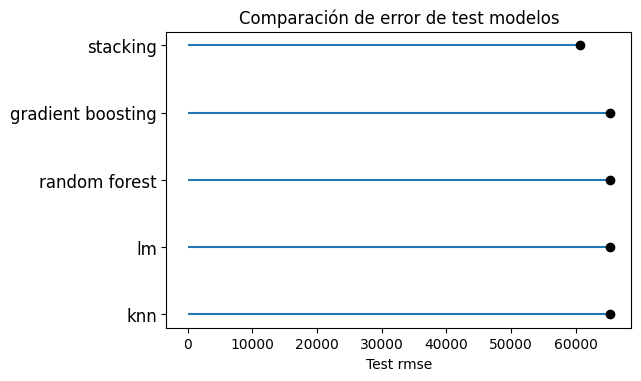

In [ ]:
error_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting',
                                   'stacking'],
                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm, rmse_stacking]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

# Predicciones con Super Stacking 

In [ ]:
y_test_pred3 = stacking_regressor.predict(X_test)
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_test_pred3})
df_predicciones.head()

,precio,prediccion
903,105000,101783.186111
208,113000,155309.476454
358,110500,135323.497747
1187,159000,144285.464539
319,215000,257359.586447


# Guardar el resultado y reutilizar el algoritmo.

In [ ]:
import pickle
import pandas as pd

# Guardar el modelo en formato pickle
modelo = stacking_regressor  # Tu modelo aquí
nombre_archivo = "modelo.pickle"  # Nombre del archivo pickle

with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo, archivo)

# Cargar el modelo desde el archivo pickle
with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

# Ejecutar la predicción con datos de prueba
y_test_pred3 = modelo_cargado.predict(X_test)  # X_test son tus datos de prueba

# Crear DataFrame con las predicciones y los valores reales
df_predicciones = pd.DataFrame({'precio': y_test, 'prediccion': y_test_pred3})

# Mostrar las primeras filas del DataFrame
print(df_predicciones.head(10))


      precio     prediccion
903   105000  101783.186111
208   113000  155309.476454
358   110500  135323.497747
1187  159000  144285.464539
319   215000  257359.586447
616   189900  232564.766280
1137  112000  167345.590937
1613  290000  265969.512834
1704  337000  333790.806730
1348  146500  144957.278127


In [ ]:
datos_nuevos = pd.read_csv("ruta_del_archivo.csv", sep=",")

# Se renombran las columnas para que sean más descriptivas
datos_nuevos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno", "metros_habitables",
                 "universitarios", "dormitorios", "chimenea", "banyos", "habitaciones",
                 "calefaccion","consumo_calefacion", "desague", "vistas_lago", "nueva_construccion",
                 "aire_acondicionado"]

In [ ]:
datos_nuevos.head()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [ ]:
import pickle
import pandas as pd

# Cargar el modelo desde el archivo pickle
nombre_archivo = "modelo.pickle"  # Nombre del archivo pickle

with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

# Cargar los nuevos datos desde un archivo CSV
ruta_archivo = "ruta_del_archivo.csv"
datos_nuevos = pd.read_csv(ruta_archivo, sep=",")

y_pred_nuevos = modelo_cargado.predict(datos_nuevos)

# # Crear un DataFrame con las predicciones
# df_predicciones_nuevos = pd.DataFrame({'prediccion': y_pred_nuevos})

df_predicciones = pd.DataFrame({'precio': y_test, 'prediccion': y_pred_nuevos})

# # Mostrar las primeras filas del DataFrame de predicciones
print(df_predicciones.head())

In [ ]:
pip install tensorflow

     ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
     ---------------------------------------- 0.2/272.9 MB 5.8 MB/s eta 0:00:48
     ---------------------------------------- 0.4/272.9 MB 4.6 MB/s eta 0:01:00
     ---------------------------------------- 0.6/272.9 MB 3.9 MB/s eta 0:01:10
     ---------------------------------------- 0.8/272.9 MB 4.1 MB/s eta 0:01:06
     ---------------------------------------- 1.0/272.9 MB 4.4 MB/s eta 0:01:02
     ---------------------------------------- 1.3/272.9 MB 4.4 MB/s eta 0:01:02
     ---------------------------------------- 1.5/272.9 MB 4.4 MB/s eta 0:01:03
     ---------------------------------------- 1.9/272.9 MB 4.5 MB/s eta 0:01:00
     ---------------------------------------- 2.3/272.9 MB 4.8 MB/s eta 0:00:57
     ---------------------------------------- 2.6/272.9 MB 4.9 MB/s eta 0:00:56
     ---------------------------------------- 2.9/272.9 MB 4.9 MB/s eta 0:00:56
     ---------------------------------------- 3

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
import numpy as np

# Datos de ejemplo
time_steps = np.linspace(0, 10, num=100)
sin_values = np.sin(time_steps)

# Dividir los datos en secuencias de entrada y salida
x = sin_values[:-1]
y = sin_values[1:]

# Definir los hiperparámetros del modelo
hidden_units = 32
learning_rate = 0.01
epochs = 100

# Crear el modelo RNN con TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.MeanSquaredError())

# Entrenar el modelo
model.fit(x, y, epochs=epochs)

# Generar pronósticos con el modelo entrenado
predictions = model.predict(x)

# Imprimir los primeros 10 valores pronosticados
print(predictions[:10])


Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.6683
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2343
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

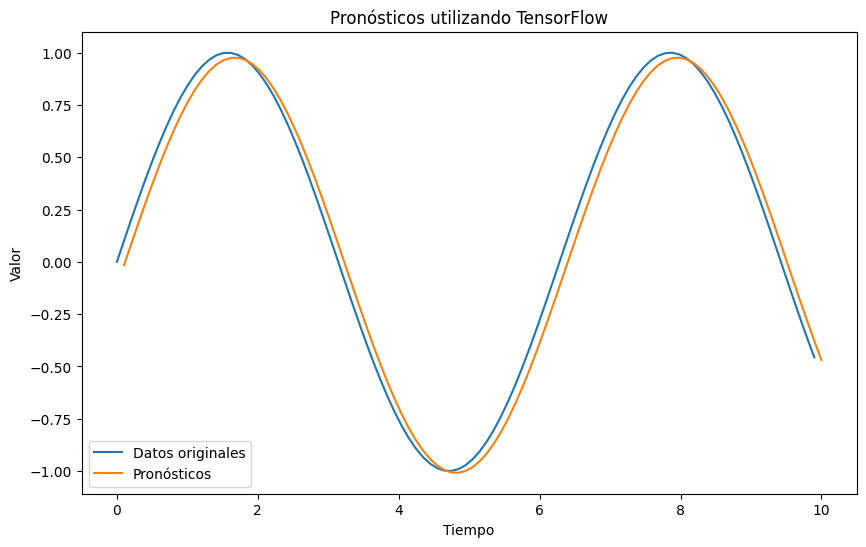

In [ ]:
import matplotlib.pyplot as plt

# ...

# Entrenar el modelo
model.fit(x, y, epochs=epochs)

# Generar pronósticos con el modelo entrenado
predictions = model.predict(x)

# Gráfico de los datos originales y los pronósticos
plt.figure(figsize=(10, 6))
plt.plot(time_steps[:-1], sin_values[:-1], label='Datos originales')
plt.plot(time_steps[1:], predictions, label='Pronósticos')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Pronósticos utilizando TensorFlow')
plt.legend()
plt.show()
